# Prep

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
url20 = "https://zenodo.org/records/8303397/files/full_data_20.csv?download=1"

gamesAt20 = pd.read_csv(url20 , sep=',')

backup = gamesAt20.copy()

In [18]:
# reset
gamesAt20 = backup.copy()

In [19]:
gamesAt20['blueFirstBlood'] = gamesAt20['blueFirstBlood'].astype(int)
gamesAt20['blueWin'] = gamesAt20['blueWin'].astype(int)
gamesAt20['redFirstBlood'] = gamesAt20['redFirstBlood'].astype(int)

gamesAt20.drop(labels=['redWin'] , axis=1 , inplace=True)

In [20]:
# add a column for the game time in minutes (for easier analysis)

gamesAt20['fullTimeMin'] = gamesAt20['fullTimeMS'] / 60000

# remove the time in MS
#gamesAt20.drop(labels=['fullTimeMS'] , axis=1 , inplace=True)

gamesAt20.drop(gamesAt20[gamesAt20['fullTimeMin'] < 17].index , inplace=True)

In [21]:
gamesAt20.drop(labels=['matchID' , 'Unnamed: 0' , 'timePercent' , 'blueWin'] , axis=1 , inplace=True)

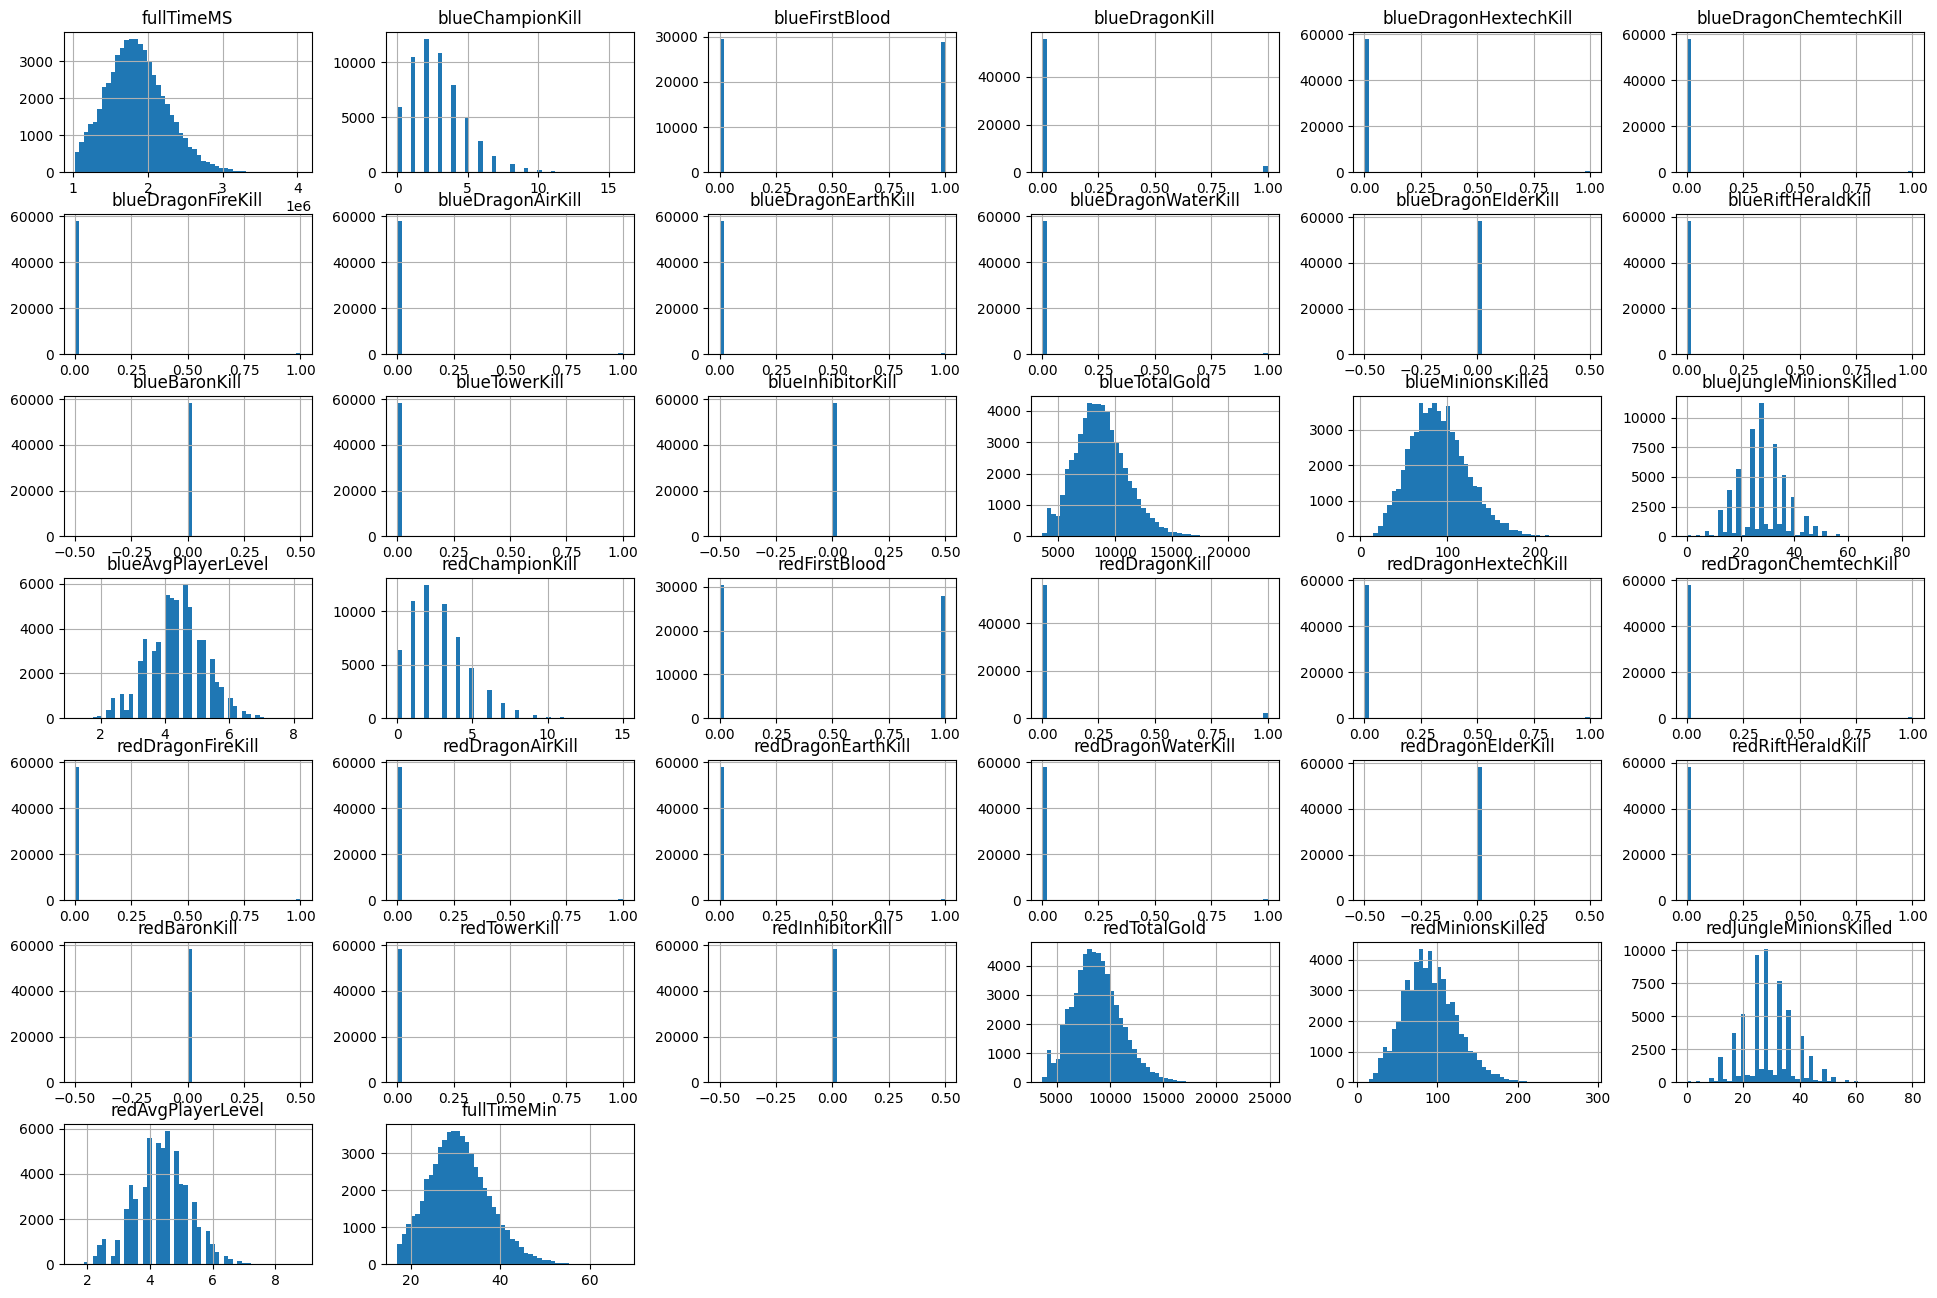

In [22]:
gamesAt20.hist(bins = 50 , figsize=(24 , 16))
plt.show()

# ML

In [26]:
from sklearn.model_selection import train_test_split

xb = gamesAt20.drop(['blueTotalGold'] , axis=1)
yb = gamesAt20['blueTotalGold']

xr = gamesAt20.drop(['redTotalGold'] , axis=1)
yr = gamesAt20['redTotalGold']

xb_train , xb_test , yb_train , yb_test = train_test_split(xb , yb , test_size=0.2 , random_state=42)
xr_train , xr_test , yr_train , yr_test = train_test_split(xr , yr , test_size=0.2 , random_state=42)
print(xb_train.shape , xb_test.shape , yb_train.shape , yb_test.shape)

(46675, 37) (11669, 37) (46675,) (11669,)


### Regression part

In [27]:
from sklearn.linear_model import LinearRegression

lin_regB = LinearRegression()
lin_regB.fit(xb_train , yb_train)

lin_regR = LinearRegression()
lin_regR.fit(xr_train , yr_train)

LinearRegression()

In [28]:
lr_yb_pred = lin_regB.predict(xb_test)
lr_yr_pred = lin_regR.predict(xr_test)

from sklearn.metrics import mean_squared_error as mse

lin_mseB = mse(yb_test , lr_yb_pred)
linbseR = mse(yr_test , lr_yr_pred)

print(lin_mseB , linbseR)

75538.40337470669 69141.39794280255


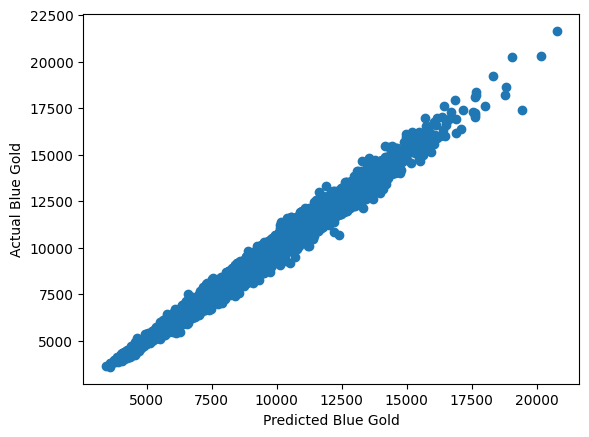

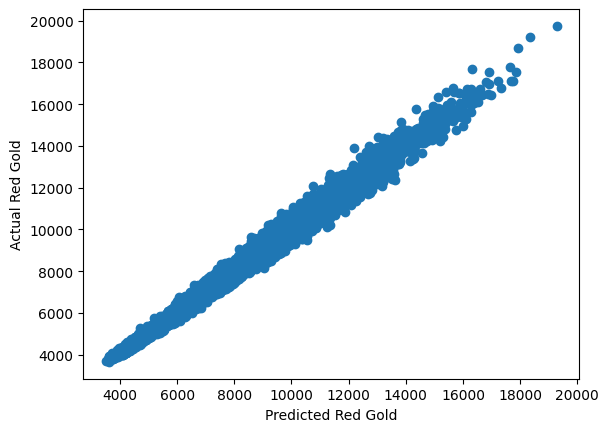

In [29]:
import matplotlib.pyplot as plt

plt.scatter(lr_yb_pred , yb_test)
plt.ylabel('Actual Blue Gold')
plt.xlabel('Predicted Blue Gold')
plt.show()

plt.scatter(lr_yr_pred , yr_test)
plt.ylabel('Actual Red Gold')
plt.xlabel('Predicted Red Gold')
plt.show()